# Week 12 Homework - Imputing Data

Each XLS or XLSX file contains a dataframe.  
* Load each XLS or XLSX file in your Jupyter notebook.  For each dataframe, address missing values by taking the following steps:

1. Count the number of missing values in the dataframe; count the number of missing values per column
1. Plot the distribution of data points using a histogram
1. Create a lag plot (a lag plot shows t versus t+1)
1. Based on the lag plot, state in a markdown cell whether the order of this data matters. 
1. Do one of the following (not both):
    1. If the order of the data matters, then interpolate the missing values
    1. If the order of the data does not matter, fill in the missing data by sampling from the distribution
    1. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
    1. Perform interpolation or sampling programmatically using Python (not manually)

### LOADING DATA SETS

In [50]:
import pandas as pd
df = pd.read_excel('imputation_homework_12.xlsx',index_col = 'Unnamed: 0')
df1 = pd.read_excel('imputation_homework_32.xls',index_col = 'Unnamed: 0')
df2 = pd.read_excel('imputation_homework_78.xlsx',index_col = 'Unnamed: 0')

### 1) CHECKING MISSING VALUES COUNT FOR EACH COLUMN OF THE DATA SETS

In [51]:
df.isna().sum()

x    9
y    0
dtype: int64

In [52]:
df1.isna().sum()

time      0
value    48
dtype: int64

In [53]:
df2.isna().sum()

date      0
value    81
dtype: int64

### 2) PLOT THE DISTRIBUTION OF DATA POINTS USING A HISTOGRAM

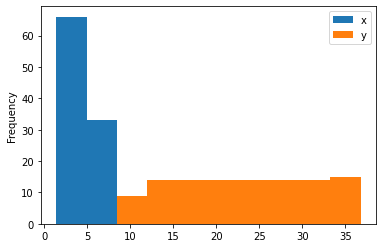

In [54]:
import matplotlib.pyplot as plt
df[["x", "y"]].plot.hist()
plt.show()

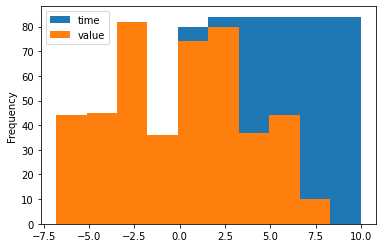

In [55]:
df1[["time", "value"]].plot.hist()
plt.show()

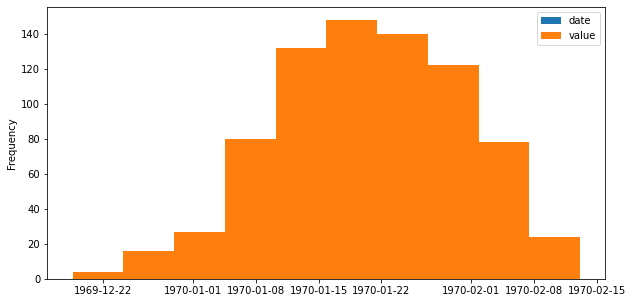

In [57]:
df2[["date", "value"]].plot.hist(figsize=(10,5))
plt.show()

### 3) LAG PLOTS

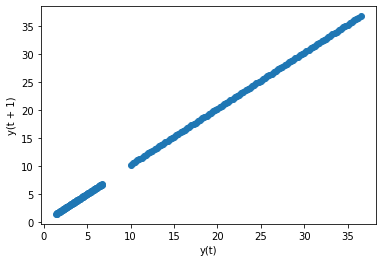

In [58]:
pd.plotting.lag_plot(df[['x','y']]);

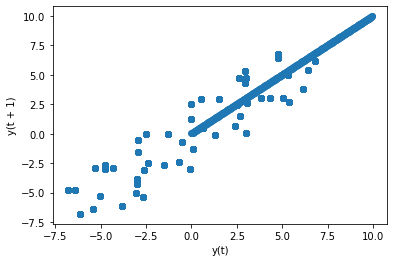

In [59]:
pd.plotting.lag_plot(df1[['time','value']]);

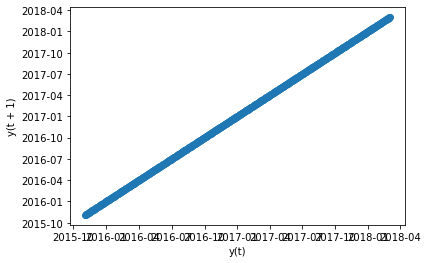

In [60]:
pd.plotting.lag_plot(df2['date']);

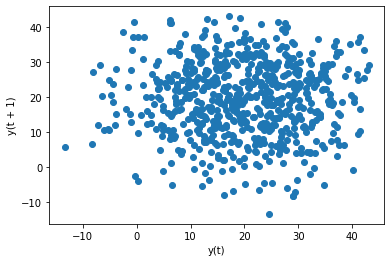

In [61]:
pd.plotting.lag_plot(df2['value']);

### 4) LAG PLOT DESC

A lag plot is used to help evaluate whether the values in a dataset or time series are random. If the data are
random, the lag plot will exhibit no identifiable pattern. If the data are not random, the lag plot will demonstrate a
clearly identifiable pattern.
In the first dataset the data have high autocorelation and in the second dataset has moderate autocorelation and third data set data is random with out any pattern.The order of the data matters as it helps to identify the patterns when we plot the graph.


### 5) INTERPOLATION

In [62]:
import numpy as np
df.x.replace(np.nan,'NaN',inplace=True)

In [63]:
df['x'].interpolate()

0       1.4
1      1.45
2       1.5
3      1.55
4       1.6
       ... 
103    6.55
104     6.6
105    6.65
106     6.7
107    6.75
Name: x, Length: 108, dtype: object

In [64]:
df.isna().sum()

x    0
y    0
dtype: int64

In [65]:
df1.value.replace(np.nan,'NaN',inplace=True)
df1['value'].interpolate(method="linear")

0             0
1       2.52878
2       2.41902
3      0.665052
4      0.506655
         ...   
495    -2.93893
496   -0.506655
497   -0.665052
498    -2.41902
499    -2.52878
Name: value, Length: 500, dtype: object

In [66]:
df1.isna().sum()

time     0
value    0
dtype: int64

In [67]:
df2.value.replace(np.nan,'NaN',inplace=True)
df2['value'].interpolate(method="linear")

0      13.3943
1     -3.80072
2      28.0982
3      20.5006
4       33.982
        ...   
847    14.4691
848    30.4668
849    13.7222
850    16.1178
851   -8.03011
Name: value, Length: 852, dtype: object

In [68]:
df2.isna().sum()

date     0
value    0
dtype: int64